## Extracting all Images 

### Import all libraries

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Note:

pip install opencv-python

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
%matplotlib inline

### The Dataset

#### MNIST Digit Recognition 

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

https://www.kaggle.com/c/digit-recognizer/data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

### Read the images and labels

In [8]:
data_file = '/content/drive/MyDrive/AdvancedML/mnist.csv'

In [9]:
digits_df = pd.read_csv(data_file)

In [10]:
digits_df.head( 11)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
digits_df.shape

(42000, 785)

In [12]:
digits_df.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

### Create a Directory and Extract all images

In [13]:
import os

In [14]:
image_dir = './mnist/'

if not os.path.exists(image_dir):
    os.makedirs(image_dir)

### For reading into numpy arrays

In [15]:
labels = digits_df.iloc[0:,0].astype(np.int32)
image_buffer = digits_df.iloc[0:,1:].values
labels_np = np.array( labels )

In [16]:
labels_np[0:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3], dtype=int32)

In [17]:
image_buffer[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
image_buffer.shape

(42000, 784)

In [19]:
dataset = zip(labels, image_buffer)

The images are 28 x 28 pixel images

### Verifying images

In [20]:
def print_image( idx ):
    plt.imshow( image_buffer[idx].reshape(28, 28));
    print( labels_np[idx] )

8


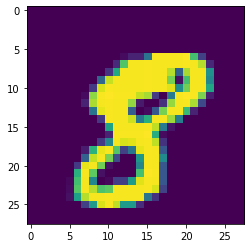

In [21]:
print_image( 10 )

### How images actually look like?

In [22]:
np.set_printoptions(precision=4, linewidth=120)

In [23]:
image_buffer[8].reshape(28, 28)[5:28, 5:25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  41, 149, 156, 179, 254, 254, 201, 119,  46,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  13, 147, 241, 253, 253, 254, 253, 253, 253, 253, 245, 160,   0,   0],
       [  0,   0,   0,   0,   0,  31, 224, 253, 253, 180, 174, 175, 174, 174, 174, 174, 223, 247, 145,   6],
       [  0,   0,   0,   0,   7, 197, 254, 253, 165,   2,   0,   0,   0,   0,   0,   0,  12, 102, 184,  16],
       [  0,   0,   0,   0, 152, 253, 254, 162,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 235, 254, 158,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  74, 250, 253,  15,   0,   0,   0,  16,  20,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   7, 199, 253, 253,   0,   0,  25, 130, 235, 254, 247, 145,   6,   0,   0,   0,   0,   0],
       [  0,   0,  20, 253, 253, 177, 100, 219, 240, 253, 253, 254, 253, 253, 125,   0,   0,   0,   0,   0],
       [  0,   0,  

### Checking shape of the image file

In [24]:
image_buffer.shape

(42000, 784)

### Reshaping all images

In [25]:
reshaped_images = np.array([x.reshape( 28, 28) for x in image_buffer])

In [26]:
reshaped_images.shape

(42000, 28, 28)

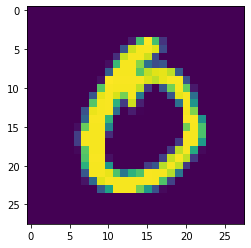

In [27]:
plt.imshow(reshaped_images[200]);

## Classifying Digits

### Importing all required libraries

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


### Set X and Y

In [30]:
X = reshaped_images

In [31]:
y = keras.utils.to_categorical( labels_np )

In [32]:
y[0:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Splitting datasets into train and test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42 )

In [35]:
X_train.shape

(33600, 28, 28)

In [36]:
X_test.shape

(8400, 28, 28)

In [37]:
y_train.shape

(33600, 10)

In [38]:
y_test.shape

(8400, 10)

In [39]:
input_shape = X_train.shape[-2:]

In [40]:
print(input_shape)

(28, 28)


### Train a model

In [41]:
# import necessary building blocks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

### Neural Networks Architecture 

- Layer
- Neurons
- Activation

In [42]:
model = Sequential()

model.add(Dense(64, input_shape=input_shape))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Flatten())

model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

### Explain number of parameters need to be trainined

- All the links (compute)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 64)            1856      
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 activation (Activation)     (None, 1792)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                57376     
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 activation_2 (Activation)   (None, 16)                0

### Loss Function

In [44]:
x_list = list(np.arange(0.0001, 10, 0.001))

In [45]:
y_list = [np.log(x) for x in x_list]

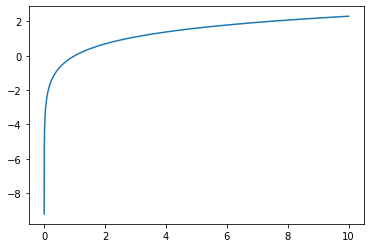

In [46]:
plt.plot(x_list, y_list)

### Gradient Descent

- Learning Rate
- Optimizers

In [47]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### Training Model

- Epochs
- Batch Size

In [48]:
EPOCHS = 20
BATCH_SIZE = 128

In [49]:
%%time 
# fit model
history = model.fit(
    X_train, 
    y_train,  # prepared data
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.3,
    shuffle = True,
    verbose=1,
)

Epoch 1/20
184/184 [==============================] - 3s 9ms/step - loss: 3.1030 - accuracy: 0.3462 - val_loss: 1.4611 - val_accuracy: 0.5406
Epoch 2/20
184/184 [==============================] - 2s 8ms/step - loss: 1.2551 - accuracy: 0.6043 - val_loss: 1.0960 - val_accuracy: 0.6256
Epoch 3/20
184/184 [==============================] - 2s 8ms/step - loss: 0.9285 - accuracy: 0.7267 - val_loss: 0.8529 - val_accuracy: 0.7747
Epoch 4/20
184/184 [==============================] - 2s 8ms/step - loss: 0.7697 - accuracy: 0.7820 - val_loss: 0.7574 - val_accuracy: 0.8001
Epoch 5/20
184/184 [==============================] - 2s 8ms/step - loss: 0.6717 - accuracy: 0.8117 - val_loss: 0.6941 - val_accuracy: 0.8174
Epoch 6/20
184/184 [==============================] - 2s 8ms/step - loss: 0.6018 - accuracy: 0.8345 - val_loss: 0.6451 - val_accuracy: 0.8348
Epoch 7/20
184/184 [==============================] - 2s 8ms/step - loss: 0.5492 - accuracy: 0.8500 - val_loss: 0.5834 - val_accuracy: 0.8532
Epoch 

In [50]:
# summarize history for accuracy

def plot_train_val_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [51]:
# summarize history for loss

def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

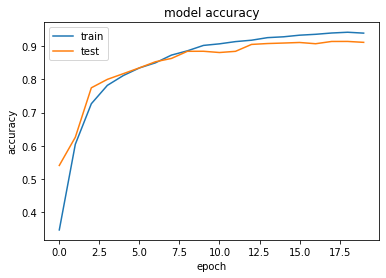

In [52]:
plot_train_val_accuracy(history.history)

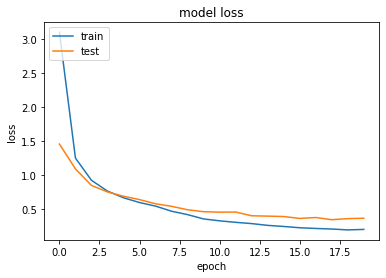

In [53]:
plot_train_val_loss(history.history)

### Predict and Evaluate

In [54]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

263/263 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.9119

Test accuracy:  0.9119047522544861


In [55]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)

In [56]:
np.round(predictions, 2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 0.96, 0.  , ..., 0.  , 0.01, 0.01],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.93],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.93]], dtype=float32)

In [57]:
pred_labels

array([8, 1, 9, ..., 3, 0, 9])

### Verifying Predictions

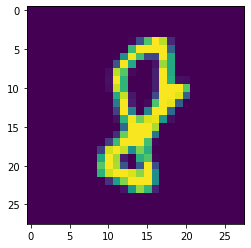

In [58]:
plt.imshow(X_test[0])

In [59]:
pred_labels[0]

8

In [60]:
len(X_test)

8400

### Randomly show a set of images and predictions

In [61]:
import random 

all_indexes = list(range(len(X_test)))
test_indexes = random.sample( all_indexes, 15 )

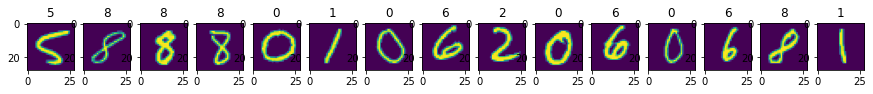

In [62]:
k = 1
plt.figure( figsize=(15, 6))
for i in test_indexes:
    plt.subplot(1, 15, k);
    plt.imshow(X_test[i])
    plt.title(str(pred_labels[i]))
    k = k + 1
plt.show()

### Confusion Matrix

In [63]:
np_label_list = list(np.unique(labels_np))

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
predictions = model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)

In [66]:
y_actual_classes = np.argmax(y_test, axis=1)

In [67]:
y_pred_classes

array([8, 1, 9, ..., 3, 0, 9])

In [68]:
y_actual_classes

array([8, 1, 9, ..., 3, 0, 9])

In [69]:
confusion_matrix(y_actual_classes, y_pred_classes)

array([[775,   0,   2,   0,   1,   1,   4,   0,  29,   4],
       [  0, 875,  12,   6,   2,   6,   4,   1,   1,   2],
       [  0,   2, 775,  12,   5,   8,   4,   6,  34,   0],
       [  0,   0,  41, 839,   0,  43,   0,   7,   5,   2],
       [  1,   1,   5,   0, 792,   1,   4,   2,   1,  32],
       [  4,  13,   7,  97,   0, 534,   2,   1,  15,  29],
       [  8,   4,   5,   1,  14,   1, 743,   0,   9,   0],
       [  0,   0,  25,   9,   0,   5,   0, 826,   0,  28],
       [ 22,   0,  37,   1,   2,  20,   5,   2, 738,   8],
       [  5,   0,   1,   2,  14,  29,   1,  21,   2, 763]])

In [70]:
import seaborn as sn

In [71]:
def plot_confustion_matrix(y_test, y_pred):
    plt.figure(figsize=(10, 8))
    plt.title('Confusion matrix', fontsize=16)
    cm = confusion_matrix(y_test, y_pred, labels = np_label_list)
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = np_label_list, 
               yticklabels = np_label_list )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.show()

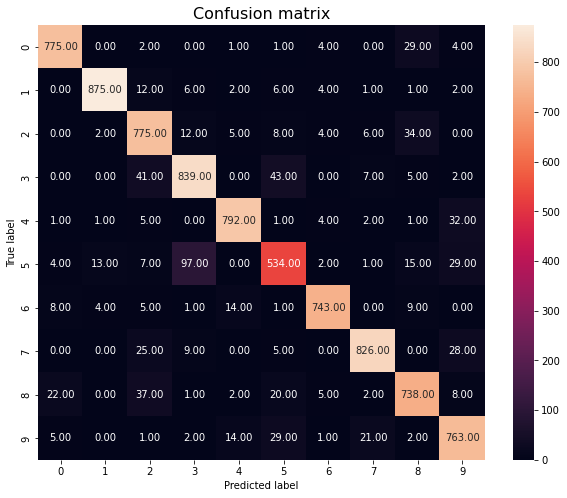

In [72]:
plot_confustion_matrix(y_actual_classes, y_pred_classes)

In [77]:
from sklearn.metrics import classification_report, accuracy_score

In [78]:
print(classification_report(y_actual_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       816
           1       0.98      0.96      0.97       909
           2       0.85      0.92      0.88       846
           3       0.87      0.90      0.88       937
           4       0.95      0.94      0.95       839
           5       0.82      0.76      0.79       702
           6       0.97      0.95      0.96       785
           7       0.95      0.92      0.94       893
           8       0.88      0.88      0.88       835
           9       0.88      0.91      0.89       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



In [79]:
accuracy_score(y_actual_classes, y_pred_classes)

0.9119047619047619

### Exercise: Build a deeper model

- Add one more layers with 128 neurons

# Convolution Neural Networks (CNN)
## What is Convolution?

- Filter
- Kernel Size

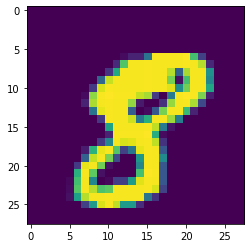

In [80]:
plt.grid(False)
plt.imshow( image_buffer[10].reshape(28, 28));

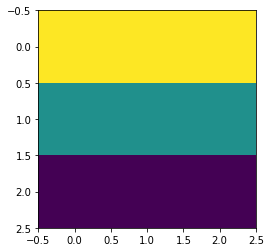

In [81]:
top=[[ 1, 1, 1],
     [ 0, 0, 0],     
     [ -1, -1, -1]]
plt.grid(False)
plt.imshow(top);

In [82]:
from scipy.ndimage.filters import correlate, convolve

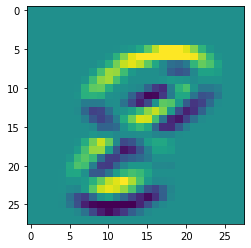

In [83]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   top)
plt.grid(False)
plt.imshow(convtop);

In [84]:
np.rot90(top, 1)

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

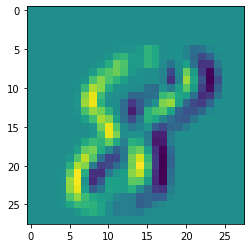

In [85]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   np.rot90(top, 1))
plt.grid(False)
plt.imshow(convtop);

## CNN Model

- Strides
- Padding
- MaxPooling

In [86]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [87]:
X_train_shape = X_train.shape
print(X_train_shape)

(33600, 28, 28)


In [88]:
X_test_shape = X_test.shape
print(X_test_shape)

(8400, 28, 28)


In [89]:
X_train_reshaped = X_train.reshape(X_train_shape[0],
                                   X_train_shape[1],
                                   X_train_shape[2], 1)

X_test_reshaped = X_test.reshape(X_test_shape[0],
                                 X_test_shape[1],
                                 X_test_shape[2], 1)

In [90]:
X_train_reshaped.shape

(33600, 28, 28, 1)

In [91]:
new_input_shape = (X_train_shape[1],X_train_shape[2], 1)

In [92]:
new_input_shape

(28, 28, 1)

### Model 1 

- Conv2D -> Dense(10) -> Softmax

In [93]:
tf.keras.backend.clear_session() # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model.add(Activation('relu'))
                            
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
    
model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 activation (Activation)     (None, 26, 26, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 10)                13530     
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

In [95]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [96]:
%%time

history = model.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/20
263/263 [==============================] - 9s 31ms/step - loss: 4.3548 - accuracy: 0.8221 - val_loss: 1.0771 - val_accuracy: 0.9135
Epoch 2/20
263/263 [==============================] - 8s 30ms/step - loss: 0.6893 - accuracy: 0.9346 - val_loss: 0.5743 - val_accuracy: 0.9349
Epoch 3/20
263/263 [==============================] - 8s 30ms/step - loss: 0.3592 - accuracy: 0.9546 - val_loss: 0.3948 - val_accuracy: 0.9501
Epoch 4/20
263/263 [==============================] - 8s 30ms/step - loss: 0.2319 - accuracy: 0.9649 - val_loss: 0.3638 - val_accuracy: 0.9542
Epoch 5/20
263/263 [==============================] - 8s 30ms/step - loss: 0.1658 - accuracy: 0.9714 - val_loss: 0.3372 - val_accuracy: 0.9543
Epoch 6/20
263/263 [==============================] - 8s 30ms/step - loss: 0.1195 - accuracy: 0.9756 - val_loss: 0.2931 - val_accuracy: 0.9598
Epoch 7/20
263/263 [==============================] - 8s 30ms/step - loss: 0.0998 - accuracy: 0.9778 - val_loss: 0.2690 - val_accuracy: 0.9617

### Plotting Loss and Accuracy

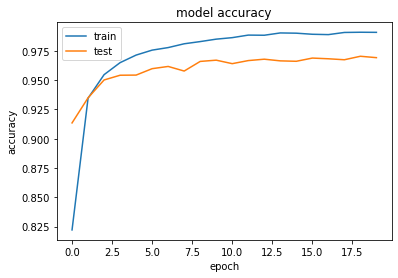

In [97]:
plot_train_val_accuracy(history.history)

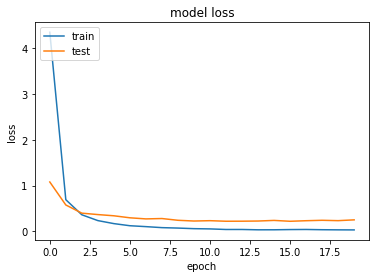

In [98]:
plot_train_val_loss(history.history)

### Model 2:

- Conv2D -> Dense(32) -> Dense(10) -> Softmax

In [ ]:
tf.keras.backend.clear_session() # clear default graph

model2 = Sequential()
model2.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model2.add(Activation('relu'))
                            
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
    
model2.add(Dense(32))    
model2.add(Activation('relu'))

model2.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model2.add(Activation('softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [ ]:
model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
BATCH_SIZE = 64
EPOCHS = 10

In [ ]:
%%time

history2 = model2.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
525/525 [==============================] - 8s 15ms/step - loss: 1.5914 - accuracy: 0.5537 - val_loss: 0.7323 - val_accuracy: 0.7771
Epoch 2/10
525/525 [==============================] - 8s 15ms/step - loss: 0.5575 - accuracy: 0.8598 - val_loss: 0.4382 - val_accuracy: 0.8977
Epoch 3/10
525/525 [==============================] - 8s 15ms/step - loss: 0.3007 - accuracy: 0.9263 - val_loss: 0.2591 - val_accuracy: 0.9357
Epoch 4/10
525/525 [==============================] - 8s 15ms/step - loss: 0.1837 - accuracy: 0.9500 - val_loss: 0.1994 - val_accuracy: 0.9507
Epoch 5/10
525/525 [==============================] - 8s 15ms/step - loss: 0.1354 - accuracy: 0.9612 - val_loss: 0.1755 - val_accuracy: 0.9571
Epoch 6/10
525/525 [==============================] - 8s 15ms/step - loss: 0.1084 - accuracy: 0.9677 - val_loss: 0.1581 - val_accuracy: 0.9613
Epoch 7/10
525/525 [==============================] - 8s 15ms/step - loss: 0.0916 - accuracy: 0.9719 - val_loss: 0.1483 - val_accuracy: 0.9598

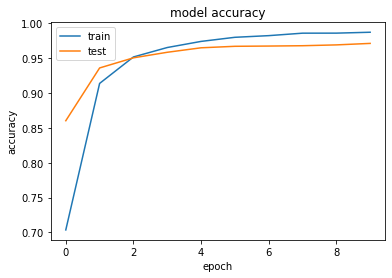

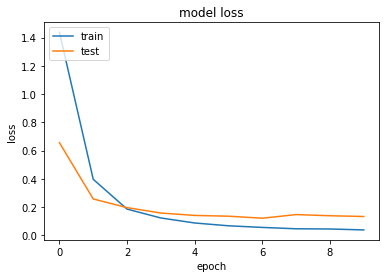

In [ ]:
plot_train_val_accuracy(history2.history)

plot_train_val_loss(history2.history)

### Model 3: 

In [ ]:
tf.keras.backend.clear_session()  # clear default graph

model3 = Sequential()
model3.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model3.add(Activation('relu'))
                            
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model3.add(Activation('relu'))
                            
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
    
model3.add(Dense(32))    
model3.add(Activation('relu'))

model3.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model3.add(Activation('softmax'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0

In [ ]:
model3.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
%%time

history3 = model3.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
525/525 [==============================] - 11s 19ms/step - loss: 2.7205 - accuracy: 0.4987 - val_loss: 0.7017 - val_accuracy: 0.8179
Epoch 2/10
525/525 [==============================] - 10s 19ms/step - loss: 0.4132 - accuracy: 0.8854 - val_loss: 0.3007 - val_accuracy: 0.9181
Epoch 3/10
525/525 [==============================] - 10s 19ms/step - loss: 0.2370 - accuracy: 0.9333 - val_loss: 0.2335 - val_accuracy: 0.9350
Epoch 4/10
525/525 [==============================] - 10s 19ms/step - loss: 0.1746 - accuracy: 0.9489 - val_loss: 0.1798 - val_accuracy: 0.9485
Epoch 5/10
525/525 [==============================] - 10s 19ms/step - loss: 0.1380 - accuracy: 0.9600 - val_loss: 0.1589 - val_accuracy: 0.9561
Epoch 6/10
525/525 [==============================] - 10s 19ms/step - loss: 0.1161 - accuracy: 0.9650 - val_loss: 0.1463 - val_accuracy: 0.9611
Epoch 7/10
525/525 [==============================] - 10s 19ms/step - loss: 0.1013 - accuracy: 0.9694 - val_loss: 0.1375 - val_accuracy:

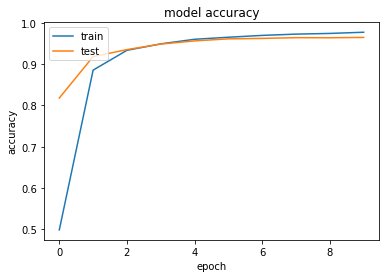

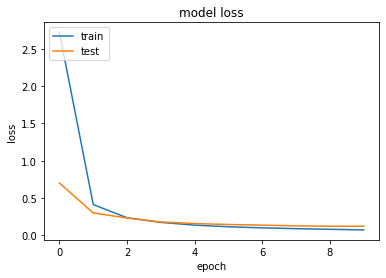

In [ ]:
plot_train_val_accuracy(history3.history)

plot_train_val_loss(history3.history)

In [ ]:
X_train_reshaped.shape

(33600, 28, 28, 1)

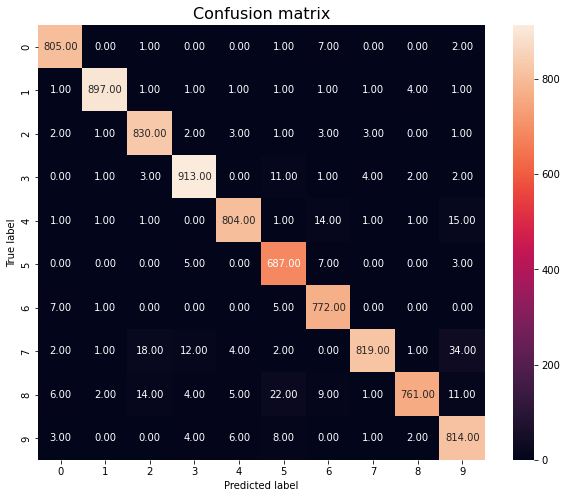

In [ ]:
predictions = model3.predict(X_test_reshaped)
predictions_3 = np.argmax(predictions, axis=1)

predictions_3 = list(predictions_3)
plot_confustion_matrix(y_actual_classes, predictions_3)

In [ ]:
print(classification_report(y_actual_classes, predictions_3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       816
           1       0.99      0.99      0.99       909
           2       0.96      0.98      0.97       846
           3       0.97      0.97      0.97       937
           4       0.98      0.96      0.97       839
           5       0.93      0.98      0.95       702
           6       0.95      0.98      0.97       785
           7       0.99      0.92      0.95       893
           8       0.99      0.91      0.95       835
           9       0.92      0.97      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(predictions_3, 
                       y_actual_classes)

0.9645238095238096

### Which digits have gone wrong?

In [ ]:
y_actual_classes_list = list(y_actual_classes) 

In [ ]:
digit_indexes = [i for i, val in enumerate(y_actual_classes_list) if val == 5]

In [ ]:
misclassfied_indexes = [i for i in digit_indexes if y_actual_classes_list[i] != predictions_3[i]]

In [ ]:
misclassfied_indexes

[164, 445, 1233, 2199, 2814, 4733, 4803, 5602, 7148, 7811, 8302, 8368]

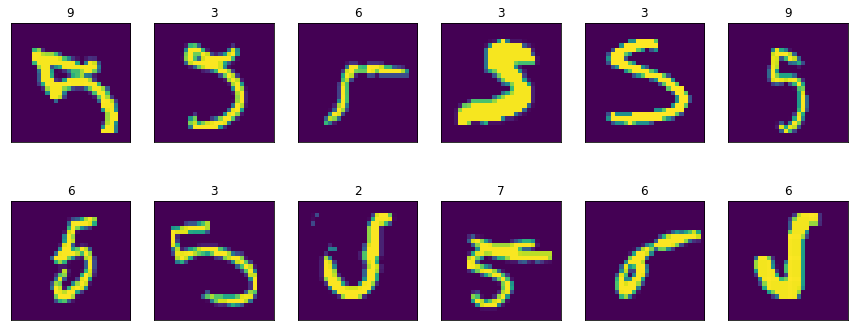

In [ ]:
k = 1
plt.figure( figsize=(15, 6))
for i in misclassfied_indexes:
    plt.subplot(2, len(misclassfied_indexes)/2, k);
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(X_test[i])
    plt.title(str(predictions_3[i]) + str())
    k = k + 1
plt.show()

### Saving Model

In [ ]:
model3.save('digits_model_3.h5')

In [ ]:
!ls -al

total 6672
drwxr-xr-x  14 manaranjan  staff      476 Aug 29 14:34 .
drwxr-xr-x   7 manaranjan  staff      238 Aug 28 20:45 ..
-rw-r--r--@  1 manaranjan  staff     6148 Aug 29 09:56 .DS_Store
drwxr-xr-x   6 manaranjan  staff      204 Aug 29 10:29 .ipynb_checkpoints
-rw-r--r--@  1 manaranjan  staff   110076 Aug 23 17:04 Boston House - NN Model 1.0.ipynb
-rw-r--r--   1 manaranjan  staff   583461 Aug 29 09:55 House_Price_Analysis_New_2.0.ipynb
-rw-r--r--@  1 manaranjan  staff   305224 Aug 23 17:03 IMDB Classification - BoW and Embeddings.ipynb
-rw-r--r--@  1 manaranjan  staff   105856 Aug 23 17:04 IMDB Classification - Sequence Modelling.ipynb
-rw-r--r--@  1 manaranjan  staff   259018 Aug 29 14:32 MNIST Digit Classification.ipynb
-rw-r--r--@  1 manaranjan  staff   231804 Aug 29 10:20 Scania Truck Failure Prediction 1.0.ipynb
-rw-r--r--@  1 manaranjan  staff    30151 Aug 29 10:27 Sentiment Analysis 1.0.ipynb
-rw-r--r--@  1 manaranjan  staff  1631699 Aug 23 17:20 Tomato+Transfer+Learning+-+B

## Load model and make prediction

In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('digits_model_3.h5')

In [ ]:
predictions_new = new_model.predict_classes(X_test_reshaped)

In [ ]:
predictions_new[0:10]

array([8, 1, 9, 9, 8, 5, 2, 2, 7, 1])

### Dive Deeper into the Model Weights

In [ ]:
weights = model3.get_weights()

#### Checking the weights metrics dimensions

In [ ]:
weights[0].shape

(3, 3, 1, 8)

In [ ]:
weights[1].shape

(8,)

In [ ]:
weights[2].shape

(3, 3, 8, 8)

In [ ]:
weights[3].shape

(8,)

In [ ]:
weights[4].shape

(200, 32)

#### Get the first filter in first convolution layer

In [ ]:
filter1 = weights[0][:,:,:,0:1].reshape(3, 3)

In [ ]:
filter1

array([[ 0.0507,  0.1832,  0.0148],
       [-0.1064, -0.0728,  0.0197],
       [ 0.1038, -0.0117, -0.0189]], dtype=float32)

#### Applying the convolutions to one image

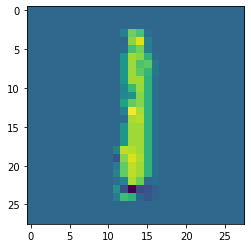

In [ ]:
convtop = convolve(image_buffer[2].reshape(28, 28), 
                   filter1)
plt.grid(False)
plt.imshow(convtop);